In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

In [3]:
data = pd.read_csv('termodvoika.csv')

## Калибрация на термодвойката

-0.001296166607421727 1.1468937834405615 -29.88816201597404
0.2778464603128773
0.24225997587969042


Text(0, 0.5, 'E, mV')

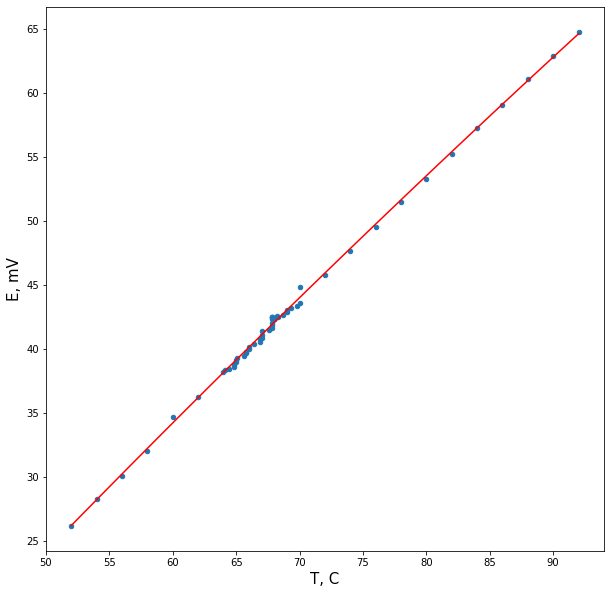

In [8]:
f = lambda x, a, b, c: a*x**2 + b*x + c

fig, ax = plt.subplots(figsize=(10, 10))
data.plot.scatter(x='T, C', y='E, mV', ax=ax)

popt, pcov = optimize.curve_fit(f, data['T, C'], data['E, mV'])
a, b, c = popt
print(a, b, c)
e_rmse = (pd.Series([
    (f(x, a, b, c) - y)**2 for (x, y) in zip(data['T, C'], data['E, mV'])
    ]).mean())**0.5
print(e_rmse)
print(e_rmse/b)

xs = np.linspace(data['T, C'].min(), data['T, C'].max(), 50)
ys = [f(x, a, b, c) for x in xs]
plt.plot(xs, ys, 'r')

ax.set_xlabel('T, C', fontsize=15)
ax.set_ylabel('E, mV', fontsize=15)
